# Lecture 10

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [16]:
type(mnist)

sklearn.utils._bunch.Bunch

In [8]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [9]:
mnist.DESCR.split('\n')

['**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  ',
 '**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  ',
 '**Please cite**:  ',
 '',
 'The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  ',
 '',
 'It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were c

In [19]:
X = mnist.data
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
y = mnist.target
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [21]:
X.shape

(70000, 784)

In [22]:
y.shape

(70000,)

In [25]:
# There are 70,000 images, and each image has 784 features. 
# This is because each image is 28 × 28 pixels, 
# and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 
28 * 28

784

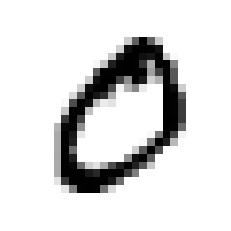

In [27]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[1]
plot_digit(some_digit)
plt.show()

In [28]:
y[1]

'0'

You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset returned by fetch_openml() is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [29]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [30]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [31]:
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


# Training a Binary Classifier

Suppose I want to build a model to classify the number 0, "0-detector". This is a binary classifier since the corresponding outcome is either zero or not.

In [32]:
set(y_train)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [33]:
y_train == 0

array([False, False, False, ..., False, False, False])

In [34]:
y_train_0 = (y_train == 0)
y_train_0.sum()

0

What's wrong?

In [35]:
y_train_0 = (y_train == '0')
y_train_0.sum()

5923

In [36]:
y_test_0 = (y_test == '0')

Now let’s pick a classifier and train it. A good place to start is with a stochastic gradient descent (SGD, or stochastic GD) classifier, using Scikit-Learn’s SGDClassifier class. This classifier is capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time, which also makes SGD well suited for online learning, as you will see later. 

In [37]:
from sklearn.linear_model import SGDClassifier
# Remember the structure of LinearRegression estimator

In [38]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

SGDClassifier(random_state=42)

Let's see what attributes are available: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


In [44]:
sgd_clf.coef_.shape

(1, 784)

In [43]:
X_train.shape

(60000, 784)

In [48]:
print(y[2])
sgd_clf.predict([X[2]])

4


array([False])

In [51]:
print(y[1])
sgd_clf.predict([X[1]])

0


array([ True])

# Performance Measures

We use score() to measure the LinearRegression performance, which is $R^2$. Now see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.score

In [56]:
sgd_clf.score(X_train, y_train_0)

0.99155

Let's use the cross_val_score() function to evaluate our SGDClassifier model, using k-fold cross-validation with three folds. Remember that k-fold cross-validation means splitting the training set into k folds (in this case, three), then training the model k times, holding out a different fold each time for evaluation

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

array([0.9854, 0.9847, 0.9865])

Above 90 percent accuracy seems amazing, but see:

In [58]:
100 - y_train_0.sum() / len(y_train) * 100

90.12833333333333

If you always guess that an image is not a 0, you will be right about 90% of the time. It is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets. 

# Confusion Matrices